In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import ppscore as pps

In [2]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Decision Tree\heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [5]:
data.size

11804

In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


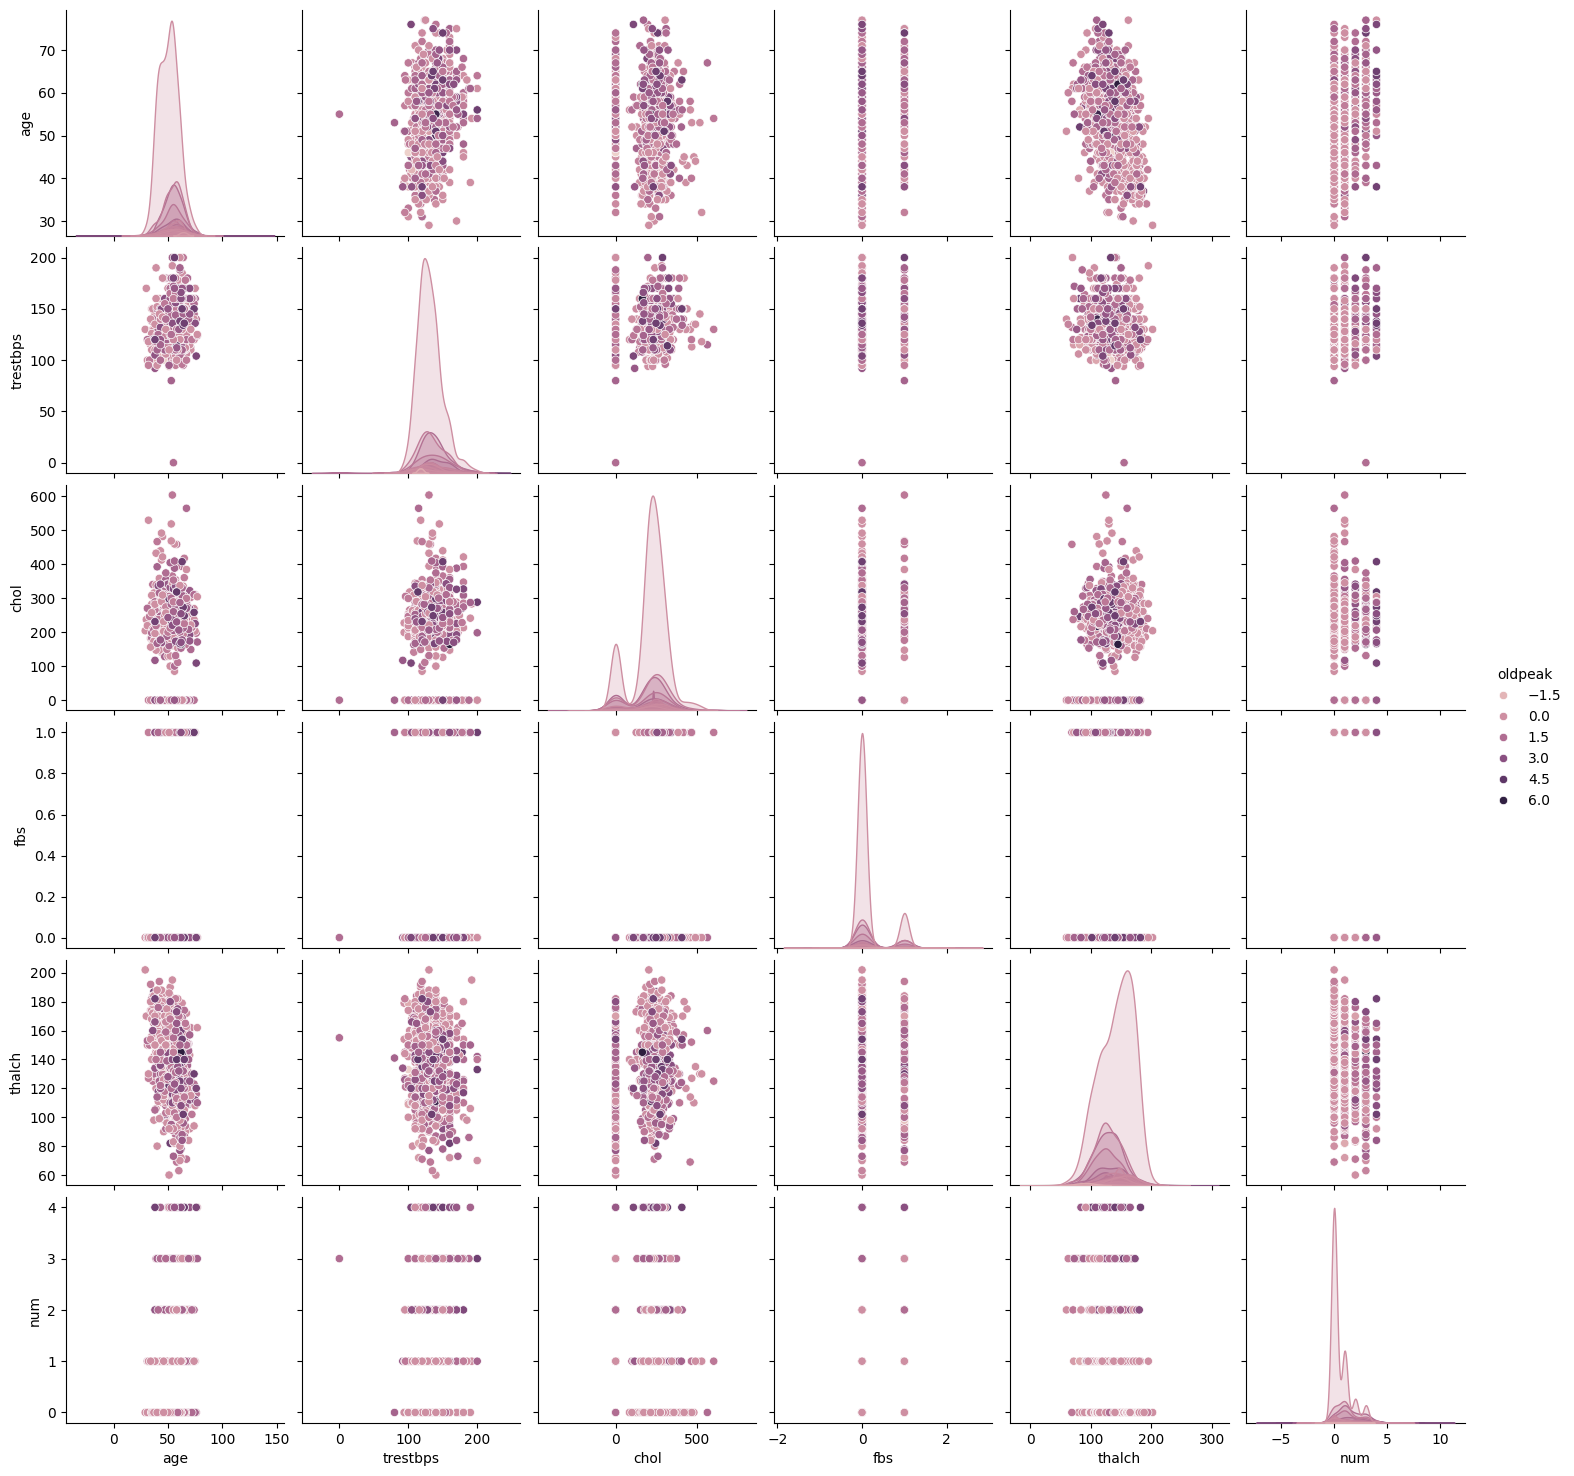

In [9]:
sns.pairplot(data=data, hue = 'oldpeak')
plt.show()

In [11]:
data.groupby(['sex','cp','fbs','restecg','exang','slope','thal']).count()

age  \
sex    cp             fbs   restecg          exang slope       thal                     
Female asymptomatic   False lv hypertrophy   FALSE downsloping normal               1   
                                                               reversable defect    1   
                                                   flat        normal               4   
                                                               reversable defect    3   
                                                   upsloping   normal               5   
...                                                                               ...   
Male   typical angina True  normal           FALSE flat        reversable defect    1   
                                                   upsloping   fixed defect         2   
                                                               reversable defect    1   
                            st-t abnormality FALSE downsloping normal               1   
                                             TURE  flat        normal               1   

                                                                                  trestbps  \
sex    cp             fbs   restecg          exang slope       thal                          
Female asymptomatic   False lv hypertrophy   FALSE downsloping normal                    1   
                                                               reversable defect         1   
                                                   flat        normal                    4   
                                                               reversable defect         3   
                                                   upsloping   normal                    5   
...                                                                                    ...   
Male   typical angina True  normal           FALSE flat        reversable defect         1   
                                                   upsloping   fixed defect              2   
                                                               reversable defect         1   
                            st-t abnormality FALSE downsloping normal                    1   
                                             TURE  flat        normal                    1   

                                                                                  chol  \
sex    cp             fbs   restecg          exang slope       thal                      
Female asymptomatic   False lv hypertrophy   FALSE downsloping normal                1   
                                                               reversable defect     1   
                                                   flat        normal                4   
                                                               reversable defect     3   
                                                   upsloping   normal                5   
...                                                                                ...   
Male   typical angina True  normal           FALSE flat        reversable defect     1   
                                                   upsloping   fixed defect          2   
                                                               reversable defect     1   
                            st-t abnormality FALSE downsloping normal                1   
                                             TURE  flat        normal                1   

                                                                                  thalch  \
sex    cp             fbs   restecg          exang slope       thal                        
Female asymptomatic   False lv hypertrophy   FALSE downsloping normal                  1   
                                                               reversable defect       1   
                                                   flat        normal                  4   
                                                               reversa

In [14]:
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex']) 
data['cp']= label_encoder.fit_transform(data['cp'])
data['fbs']= label_encoder.fit_transform(data['fbs'])
data['restecg']= label_encoder.fit_transform(data['restecg'])
data['exang']= label_encoder.fit_transform(data['exang'])
data['slope']= label_encoder.fit_transform(data['slope'])
data['thal']= label_encoder.fit_transform(data['thal'])

In [15]:
data['sex']=data['sex'].astype('category')
data['cp']=data['cp'].astype('category')
data['fbs']=data['fbs'].astype('category')
data['restecg']=data['restecg'].astype('category')
data['exang']=data['exang'].astype('category')
data['slope']=data['slope'].astype('category')
data['thal']=data['thal'].astype('category')

In [16]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,0,4
905,56,1,2,170,0,0,0,123,1,2.5,0,2,4
906,56,1,2,144,208,1,2,105,2,NaN,0,1,4


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       908 non-null    int64   
 1   sex       908 non-null    category
 2   cp        908 non-null    category
 3   trestbps  908 non-null    int64   
 4   chol      908 non-null    int64   
 5   fbs       908 non-null    category
 6   restecg   908 non-null    category
 7   thalch    908 non-null    int64   
 8   exang     908 non-null    category
 9   oldpeak   846 non-null    float64 
 10  slope     908 non-null    category
 11  thal      908 non-null    category
 12  num       908 non-null    int64   
dtypes: category(7), float64(1), int64(5)
memory usage: 49.9 KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\2032108722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='magma', annot=True, fmt='.3f')


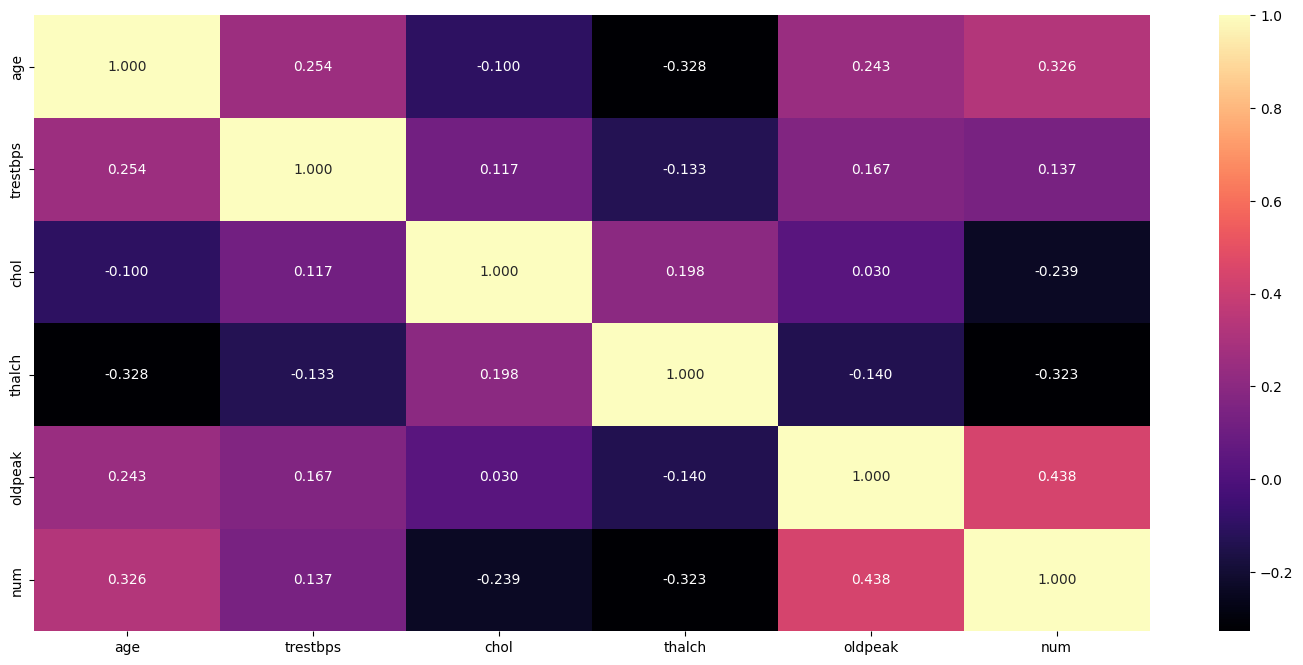

In [19]:
plt.figure(figsize = (18, 8));
sns.heatmap(data.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

<Axes: xlabel='age', ylabel='fbs'>

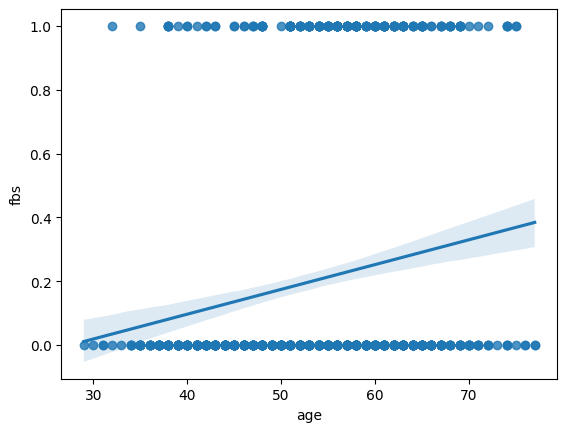

In [20]:
sns.regplot(data=data, x="age", y="fbs")

<Axes: xlabel='age', ylabel='Count'>

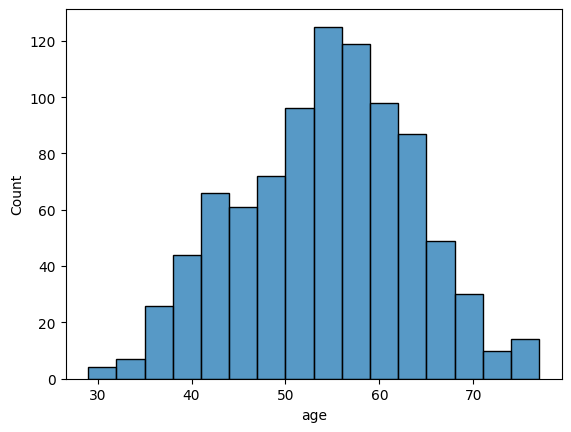

In [21]:
sns.histplot(data=data, x="age", binwidth=3)

<Axes: xlabel='age', ylabel='fbs'>

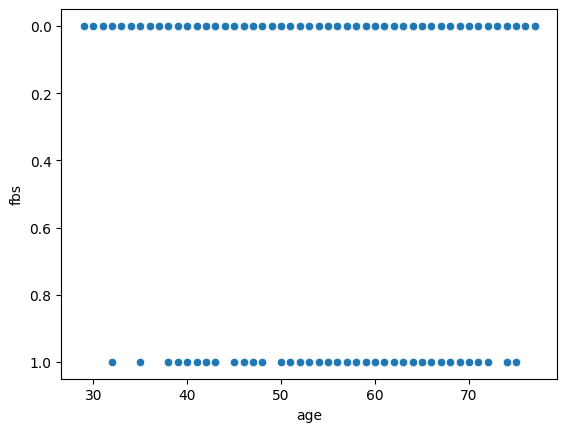

In [22]:
sns.scatterplot(data=data, x="age", y="fbs")

In [23]:
x=data.drop(['age'], axis=1)
y=data[['age']]
x.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,3,145,233,1,0,150,0,2.3,0,0,0
1,1,1,135,203,0,1,132,0,0.0,1,0,0
2,1,0,140,192,0,1,148,0,0.4,1,0,0
3,1,3,118,186,0,0,190,0,0.0,1,0,0
4,1,0,110,201,0,1,126,1,1.5,1,0,0


In [24]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,sex,0.017929,classification,True,weighted F1,0.698349,0.703757,DecisionTreeClassifier()
2,age,cp,0.022336,classification,True,weighted F1,0.396476,0.409956,DecisionTreeClassifier()
3,age,trestbps,0.000000,regression,True,mean absolute error,15.393172,15.946040,DecisionTreeRegressor()
4,age,chol,0.000000,regression,True,mean absolute error,80.462555,89.151583,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,num,exang,0.305584,classification,True,weighted F1,0.505507,0.656616,DecisionTreeClassifier()
165,num,oldpeak,0.124051,regression,True,mean absolute error,0.881797,0.772409,DecisionTreeRegressor()
166,num,slope,0.175135,classification,True,weighted F1,0.377753,0.486730,DecisionTreeClassifier()
167,num,thal,0.082555,classification,True,weighted F1,0.378855,0.430133,DecisionTreeClassifier()


In [25]:
pps.score(data, "age", "fbs")

{'x': 'age',
 'y': 'fbs',
 'ppscore': 0,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.7059383584028608,
 'model_score': 0.7048814617646679,
 'model': DecisionTreeClassifier()}

In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
array = data.values
X = array[:,1:11]
y = array[:,0]
y

array([63., 41., 57., 52., 57., 66., 56., 48., 57., 53., 30., 66., 54.,
       53., 56., 37., 46., 68., 76., 58., 42., 64., 71., 69., 58., 45.,
       53., 44., 66., 66., 39., 56., 62., 54., 50., 55., 49., 37., 43.,
       51., 41., 52., 42., 45., 44., 48., 43., 36., 59., 61., 46., 51.,
       64., 45., 45., 46., 60., 51., 71., 48., 62., 51., 67., 70., 47.,
       65., 51., 42., 65., 69., 41., 55., 47., 51., 65., 59., 52., 50.,
       57., 53., 54., 60., 58., 50., 42., 71., 43., 50., 54., 62., 49.,
       41., 58., 55., 54., 41., 52., 44., 45., 37., 44., 54., 60., 43.,
       49., 41., 63., 46., 67., 52., 58., 53., 38., 34., 57., 35., 48.,
       42., 42., 56., 63., 39., 41., 47., 44., 59., 39., 41., 35., 52.,
       45., 48., 44., 34., 29., 74., 51., 64., 54., 57., 59., 41., 44.,
       51., 46., 37., 50., 43., 68., 59., 42., 75., 56., 58., 62., 54.,
       64., 67., 59., 56., 52., 64., 58., 64., 65., 52., 68., 54., 46.,
       43., 52., 56., 54., 44., 57., 53., 60., 51., 57., 40., 51

In [51]:


colnames = list(data.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

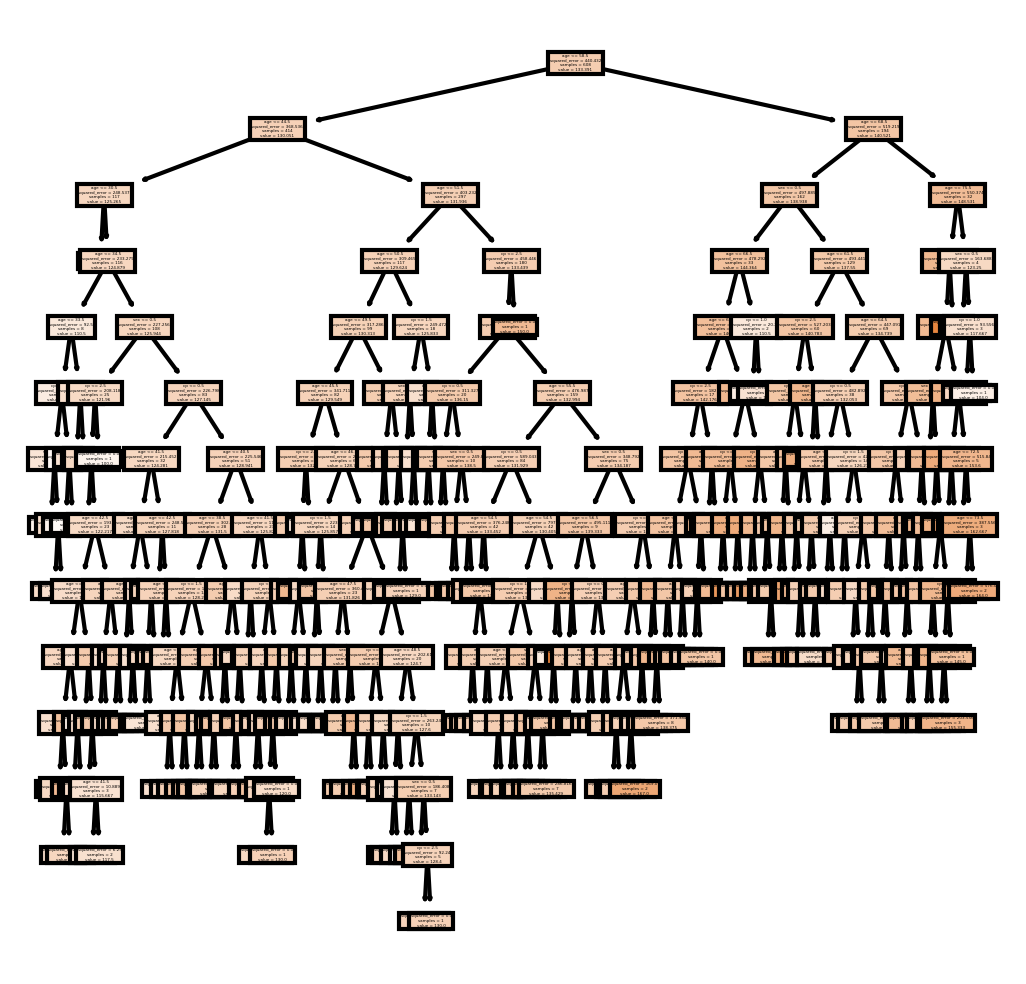

In [54]:
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

54    83
58    40
63    29
52    10
45     9
43     7
38     4
dtype: int64

In [38]:
preds

array([54, 63, 54, 54, 54, 58, 58, 58, 58, 38, 63, 54, 58, 54, 54, 54, 58,
       45, 54, 43, 45, 54, 58, 54, 54, 54, 54, 54, 54, 58, 38, 63, 54, 58,
       63, 63, 54, 52, 54, 54, 63, 54, 54, 52, 63, 54, 54, 58, 43, 54, 58,
       52, 63, 58, 63, 58, 54, 63, 54, 58, 54, 54, 54, 54, 54, 63, 43, 54,
       54, 54, 38, 54, 54, 54, 52, 54, 63, 54, 43, 54, 54, 58, 45, 54, 63,
       52, 54, 54, 58, 54, 58, 54, 54, 45, 54, 54, 54, 63, 45, 54, 58, 54,
       52, 54, 58, 52, 63, 54, 58, 58, 38, 54, 54, 45, 43, 63, 58, 58, 58,
       54, 58, 58, 54, 54, 58, 54, 63, 58, 63, 54, 54, 58, 63, 58, 63, 58,
       58, 54, 54, 54, 54, 52, 58, 58, 63, 54, 54, 54, 58, 54, 54, 54, 58,
       54, 43, 63, 63, 54, 63, 52, 45, 43, 63, 58, 54, 58, 52, 63, 54, 54,
       54, 63, 54, 45, 63, 63, 58, 54, 54, 58, 45, 54], dtype=int64)

In [41]:
pd.crosstab(y_test,preds) 

col_0,38,43,45,52,54,58,63
row_0,,,,,,,
31.0,0,0,0,0,1,0,0
34.0,0,1,0,0,0,0,0
35.0,0,0,0,1,0,0,0
36.0,0,1,0,0,1,0,0
37.0,0,0,1,0,1,0,0
39.0,0,0,0,0,2,1,0
40.0,0,0,0,1,0,1,0
41.0,2,1,0,1,6,0,0
42.0,0,1,0,0,4,0,0


In [42]:
np.mean(preds==y_test)

0.06043956043956044

In [44]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [46]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
model.score(X_test,y_test)

-0.45970676718503634

Interview Questions:
1. What are some common hyperparameters of decision tree models?
                decision tree hyperparameter defined decision tree in machine learning algorithm. max depth hyperparameter, min_samples_split, min_samples_leaf,max_features, min_weight_fraction_leaf. 

2. What is the difference between the Label encoding and One-hot encoding?
              one hot encoding action of converting. it convert categorical data into numerical data by splitting columns into multiple columns.redundant information is here. 
              label encoding convert each value in a column into number. unique information is here.